In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

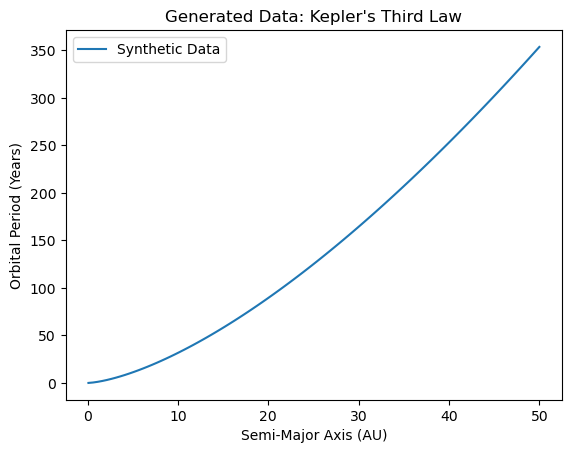

In [43]:
semi_major_axes = np.linspace(0.1, 50, 100)
orbital_periods = np.sqrt(semi_major_axes**3)
plt.figure()
plt.plot(semi_major_axes, orbital_periods, label='Synthetic Data')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (Years)')
plt.title('Generated Data: Kepler\'s Third Law')
plt.legend()
plt.show()

In [37]:
planetary_data = pd.DataFrame({
    "Planet": ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"],
    "Semi-Major Axis (AU)": [0.39, 0.72, 1.0, 1.52, 5.2, 9.58, 19.2, 30.05, 39.48],
    "Orbital Period (Years)": [0.24, 0.62, 1.0, 1.88, 11.86, 29.46, 84.01, 164.79, 248.59]
})
display(planetary_data)

,Planet,Semi-Major Axis (AU),Orbital Period (Years)
0,Mercury,0.39,0.24
1,Venus,0.72,0.62
2,Earth,1.00,1.00
3,Mars,1.52,1.88
4,Jupiter,5.20,11.86
5,Saturn,9.58,29.46
6,Uranus,19.20,84.01
7,Neptune,30.05,164.79
8,Pluto,39.48,248.59


In [35]:
exoplanet_data = pd.read_csv('PS_2024.12.06_18.05.12.csv', comment='#', sep=',')
filtered_exoplanet_data = exoplanet_data[['pl_name', 'pl_orbsmax', 'pl_orbper']].dropna()
filtered_exoplanet_data['Orbital Period (Years)'] = filtered_exoplanet_data['pl_orbper'] / 365.25
filtered_exoplanet_data.rename(columns={
    'pl_name': 'Planet Name',
    'pl_orbsmax': 'Semi-Major Axis (AU)',
    'Orbital Period (Years)': 'Orbital Period (Years)'
}, inplace=True)
display(filtered_exoplanet_data.head())


,Planet Name,Semi-Major Axis (AU),pl_orbper,Orbital Period (Years)
1,11 Com b,1.290,326.03000,0.892621
2,11 Com b,1.178,323.21000,0.884901
3,11 UMi b,1.530,516.21997,1.413333
5,11 UMi b,1.540,516.22000,1.413333
6,14 And b,0.775,186.76000,0.511321


In [29]:
combined_data = pd.concat([
    planetary_data,
    filtered_exoplanet_data[['Semi-Major Axis (AU)', 'Orbital Period (Years)']]
])
q1 = combined_data["Semi-Major Axis (AU)"].quantile(0.25)
q3 = combined_data["Semi-Major Axis (AU)"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_data = combined_data[(combined_data["Semi-Major Axis (AU)"] >= lower_bound) & 
                              (combined_data["Semi-Major Axis (AU)"] <= upper_bound)]

display(filtered_data)

,Planet,Semi-Major Axis (AU),Orbital Period (Years)
0,Mercury,0.390000,0.240000
31,NaN,0.190000,0.083095
32,NaN,0.194000,0.083039
71,NaN,0.052000,0.011583
72,NaN,0.052350,0.011583
...,...,...,...
37945,NaN,0.059140,0.012641
37946,NaN,0.059000,0.012641
37947,NaN,0.059222,0.012641
37948,NaN,0.059400,0.012641


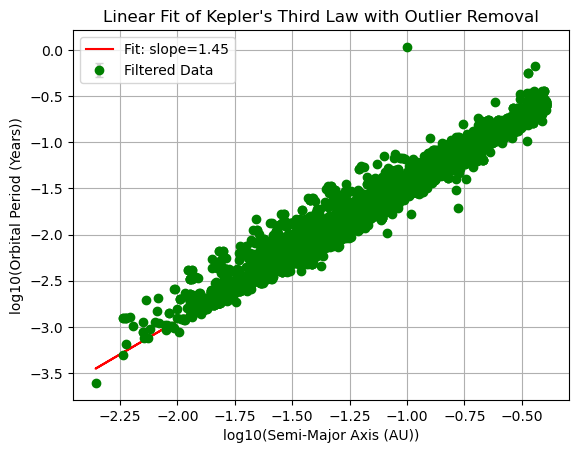

'Slope: 1.4549004161821992'

'Intercept: -0.023266729048115886'

'R-squared: 0.9784506336971969'

In [51]:
log_r = np.log10(filtered_data["Semi-Major Axis (AU)"])
log_t = np.log10(filtered_data["Orbital Period (Years)"])
slope, intercept, r_value, p_value, std_err = linregress(log_r, log_t)
plt.figure()
plt.errorbar(log_r, log_t, yerr=std_err, fmt='o', label='Filtered Data', color='green', ecolor='lightgray', elinewidth=3, capsize=3)
plt.plot(log_r, slope * log_r + intercept, label=f'Fit: slope={slope:.2f}', color='red')
plt.xlabel('log10(Semi-Major Axis (AU))')
plt.ylabel('log10(Orbital Period (Years))')
plt.title('Linear Fit of Kepler\'s Third Law with Outlier Removal')
plt.legend()
plt.grid(True)
plt.show()
display(f"Slope: {slope}")
display(f"Intercept: {intercept}")
display(f"R-squared: {r_value**2}")